Description:
To better understand pancreatic β-cell heterogeneity we generated a mouse pancreatic islet atlas capturing a wide range of biological conditions. The atlas contains scRNA-seq datasets of over 300,000 mouse pancreatic islet cells, of which more than 100,000 are β-cells, from nine datasets with 56 samples, including two previously unpublished datasets. The samples vary in sex, age (ranging from embryonic to aged), chemical stress, and disease status (including T1D NOD model development and two T2D models, mSTZ and db/db) together with different diabetes treatments. Additional information about data fields is available in anndata uns field 'field_descriptions' and on https://github.com/theislab/mm_pancreas_atlas_rep/blob/main/resources/cellxgene.md

Reference:
Hrovatin K, Bastidas-Ponce A, Bakhti M, Zappia L, Büttner M, Salinno C, Sterr M, Böttcher A, Migliorini A, Lickert H, Theis FJ. Delineating mouse β-cell identity during lifetime and in diabetes with a single cell atlas. Nat Metab. 2023 Sep;5(9):1615-1637. doi: 10.1038/s42255-023-00876-x. Epub 2023 Sep 11. PMID: 37697055; PMCID: PMC10513934.

Data:
https://datasets.cellxgene.cziscience.com/49243c50-bf0c-4b10-87f8-55ec9f455399.h5ad


In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import requests

url = 'https://datasets.cellxgene.cziscience.com/49243c50-bf0c-4b10-87f8-55ec9f455399.h5ad'
response = requests.get(url)

In [ ]:
#Save the file locally
with open('49243c50-bf0c-4b10-87f8-55ec9f455399.h5ad', 'wb') as file:
    file.write(response.content)

In [2]:
sc_MUS_data = sc.read_h5ad("49243c50-bf0c-4b10-87f8-55ec9f455399.h5ad")

In [3]:
output_h5ad = sc_MUS_data.copy()

sc.pp.normalize_total(output_h5ad)

sc.pp.log1p(output_h5ad)

In [4]:
print(output_h5ad.var.columns)

Index(['present_Fltp_2y', 'present_Fltp_adult', 'present_Fltp_P16',
       'present_NOD', 'present_NOD_elimination', 'present_spikein_drug',
       'present_embryo', 'present_VSG', 'present_STZ', 'feature_is_filtered',
       'feature_name', 'feature_reference', 'feature_biotype',
       'feature_length', 'feature_type'],
      dtype='object')


In [5]:
print(output_h5ad.var['feature_name'])

ENSMUSG00000000001      Gnai3
ENSMUSG00000000003       Pbsn
ENSMUSG00000000028      Cdc45
ENSMUSG00000000031        H19
ENSMUSG00000000037      Scml2
                       ...   
ENSMUSG00000118646    Gm56820
ENSMUSG00000118651    Gm17315
ENSMUSG00000118652    Gm54771
ENSMUSG00000118653    Ube2srt
ENSMUSG00000118659    Gm32754
Name: feature_name, Length: 30849, dtype: category
Categories (30823, object): ['0610005C13Rik', '0610006L08Rik', '0610010K14Rik', '0610012D04Rik', ..., 'mt-Nd4', 'mt-Nd4l', 'mt-Nd5', 'mt-Nd6']


In [6]:
output_h5ad = output_h5ad[output_h5ad.obs.disease == 'normal', :]

In [22]:
# Find genes containing 'KIF21A'
matches = [gene for gene in output_h5ad.var.feature_name if 'Kif21a' in gene]
print(matches)

['Kif21a']


In [8]:
unique_cell_types = output_h5ad.obs['cell_type'].unique()
print(unique_cell_types)

['pancreatic stellate cell', 'unknown', 'type B pancreatic cell', 'pancreatic D cell', 'endothelial cell', ..., 'pancreatic PP cell', 'hematopoietic cell', 'cell', 'Schwann cell', 'pancreatic acinar cell']
Length: 13
Categories (13, object): ['cell', 'endothelial cell', 'type B pancreatic cell', 'pancreatic A cell', ..., 'pancreatic stellate cell', 'Schwann cell', 'pancreatic endocrine cell', 'unknown']


In [9]:
beta_h5ad = output_h5ad[output_h5ad.obs['cell_type'] == 'type B pancreatic cell']
print(beta_h5ad.obs['cell_type'])

index
AGCTCAAAGAGTTGTA-1-MUC13976-Fltp_2y            type B pancreatic cell
TACAGTGCAAGCCATT-1-SRR10751504-spikein_drug    type B pancreatic cell
TAGACCATCAGAGGTG-1-G1-STZ                      type B pancreatic cell
GGCCGATTCAAAGTAG-1-mouse4-Fltp_adult           type B pancreatic cell
TACGGTAGTCCGTGAC-1-G1-STZ                      type B pancreatic cell
                                                        ...          
TAAGCGTTCTCCCTAG-1-MUC13976-Fltp_2y            type B pancreatic cell
ACACCGGCAGTCCTTC-1-SRR10751504-spikein_drug    type B pancreatic cell
ACGCCGACACACATGT-1-mouse2-Fltp_adult           type B pancreatic cell
GACTAACGTGAGGCTA-1-SRR10751514-spikein_drug    type B pancreatic cell
TCGAGGCGTTGGTTTG-1-mouse2-Fltp_adult           type B pancreatic cell
Name: cell_type, Length: 54401, dtype: category
Categories (1, object): ['type B pancreatic cell']


In [10]:
alpha_h5ad = output_h5ad[output_h5ad.obs['cell_type'] == 'pancreatic A cell']
delta_h5ad = output_h5ad[output_h5ad.obs['cell_type'] == 'pancreatic D cell']

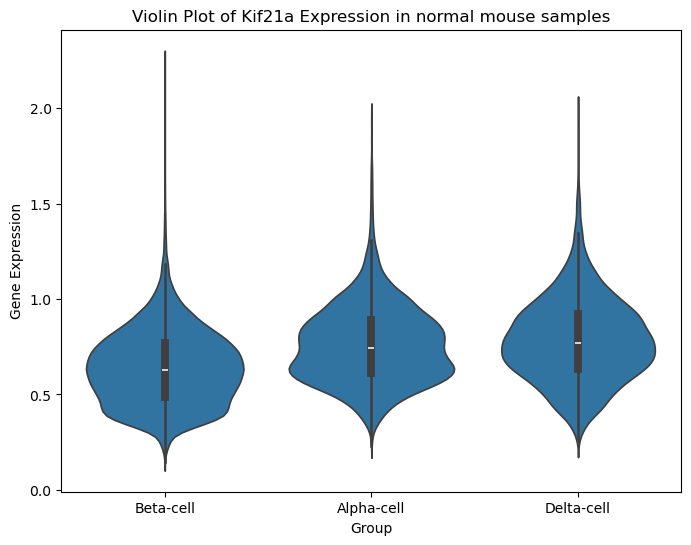

In [30]:
gene_name = 'Kif21a'

beta_expr = beta_h5ad[:, beta_h5ad.var.feature_name == gene_name].X.toarray().flatten()
alpha_expr = alpha_h5ad[:, alpha_h5ad.var.feature_name == gene_name].X.toarray().flatten()
delta_expr = delta_h5ad[:, delta_h5ad.var.feature_name == gene_name].X.toarray().flatten()

beta_expr = list(filter(lambda x: x != 0, beta_expr))
alpha_expr = list(filter(lambda x: x != 0, alpha_expr))
delta_expr = list(filter(lambda x: x != 0, delta_expr))

# Create DataFrame
df = pd.DataFrame({
    'Kif21a': np.concatenate([beta_expr, alpha_expr, delta_expr]),
    'Group': ['Beta-cell'] * len(beta_expr) + ['Alpha-cell'] * len(alpha_expr) + ['Delta-cell'] * len(delta_expr)
})

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Group', y='Kif21a', data=df)
plt.title(f'Violin Plot of Kif21a Expression in normal mouse samples')
plt.ylabel('Gene Expression')
plt.show()

In [28]:
max_length = max(len(beta_expr), len(alpha_expr), len(delta_expr))
df = pd.DataFrame({
    'Beta cell': beta_expr + [None] * (max_length - len(beta_expr)),
    'Alpha cell': alpha_expr + [None] * (max_length - len(alpha_expr)),
    'Delta cell': delta_expr + [None] * (max_length - len(delta_expr)),
})
df.to_csv('sc_MUS_Kif21a_expression_cell_types.csv', index=False)

In [3]:
output_h5ad_2 = sc_MUS_data.copy()

sc.pp.normalize_total(output_h5ad_2)

sc.pp.log1p(output_h5ad_2)

In [4]:
normal_h5ad = output_h5ad_2[output_h5ad_2.obs.disease == 'normal', :]
T2D_h5ad = output_h5ad_2[output_h5ad_2.obs.disease == 'type 2 diabetes mellitus', :]

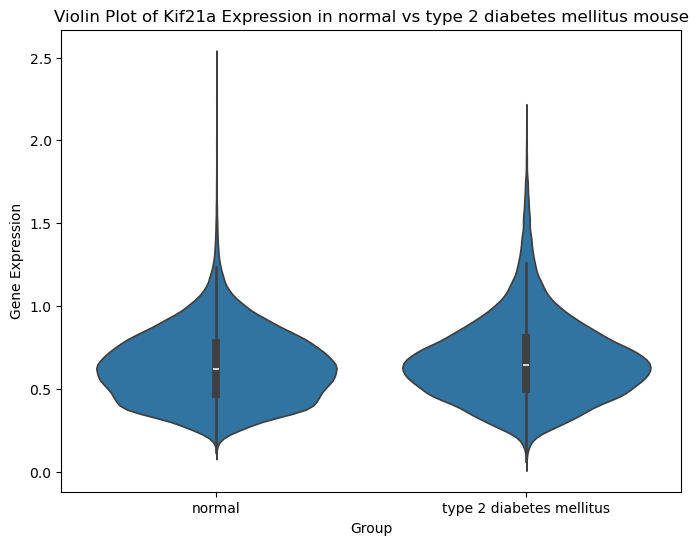

In [5]:
gene_name = 'Kif21a'

normal_expr = normal_h5ad[:, normal_h5ad.var.feature_name == gene_name].X.toarray().flatten()
T2D_expr = T2D_h5ad[:, T2D_h5ad.var.feature_name == gene_name].X.toarray().flatten()

normal_expr = list(filter(lambda x: x != 0, normal_expr))
T2D_expr = list(filter(lambda x: x != 0, T2D_expr))

# Create DataFrame
df = pd.DataFrame({
    'Kif21a': np.concatenate([normal_expr, T2D_expr]),
    'Group': ['normal'] * len(normal_expr) + ['type 2 diabetes mellitus'] * len(T2D_expr)
})

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Group', y='Kif21a', data=df)
plt.title(f'Violin Plot of Kif21a Expression in normal vs type 2 diabetes mellitus mouse')
plt.ylabel('Gene Expression')
plt.show()

In [7]:
max_length = max(len(normal_expr), len(T2D_expr))
df = pd.DataFrame({
    'normal': normal_expr + [None] * (max_length - len(normal_expr)),
    'type 2 diabetes mellitus': T2D_expr + [None] * (max_length - len(T2D_expr)),
})
df.to_csv('sc_MUS_Kif21a_expression_disease.csv', index=False)